# Reconstruction of Linear Density Modes

In [83]:
import h5py
import numpy as np
import matplotlib as plt
from matplotlib import rc
rc('font',**{'size':'10','family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
rc('text.latex', preamble='\\usepackage{amsmath},\\usepackage{amssymb}')
rc('text', usetex=True)
rc('font', size=10)
from scipy.optimize import fmin
from scipy.ndimage.filters import *
import matplotlib.pyplot as plt
from scipy import interpolate

from os.path import expanduser
home = expanduser("~")
if home == '/home/sma74':
    home = '/local/scratch/public/sma74-dropbox'

Folder = home+'/Dropbox/PhD/Projects/Reconstruction/'

f = h5py.File(Folder+'Data/Correlation_data.h5','r')
#print(f['corr_coeff'][0,1][:])
print(f['Wiener'])
def num2str(num, precision):
	return "%0.*f" % (precision, num)

legnd = [r'$r_{\text{gs}}$',r'$r_{\text{gt}}$',r'$r_{\text{st}}$']
c = ['r','k','b']
def plot_rij(file, filtr):
    fig=plt.figure(figsize=(8,5))
    axis= [0.02,0.5,0.2,1.1]
    for ihalo in range(0,5):
        ax=plt.subplot(230+ihalo+1)
        for i in range(0,3):
            ax.plot(file['kavg'][:],np.abs(file[filtr][3+i,ihalo][:]), lw=1.5, label=legnd[i])
            #ax.grid(linestyle='dotted', linewidth=0.5)
            plt.xscale('log')
            if ihalo==4:
                plt.legend(loc='lower right',ncol=1, fontsize=14)
            if ihalo==1 or ihalo==2 or ihalo==4:
                ax.set_yticks([0])
                ax.set_yticklabels([]) # remove the y-axis ticks
            else:
                plt.ylabel(r'$r_{\alpha\beta}$', fontsize=13)
            if ihalo==0 or ihalo==1:
                ax.set_xticks([0])
                ax.set_xticklabels([]) # remove the y-axis ticks
            else:
                plt.xlabel(r'$k$ $ [h$ Mpc$^{-1}$]', fontsize=12)
            ax.text(0.3,0.8,'bin '+num2str(ihalo+1,0))
            plt.axis(axis)

            ax.axvline(0.1, color='gray',ls='dotted', lw=0.5)
            ax.axhline(1, color='gray',ls='dotted', lw=0.5)

    plt.subplots_adjust(hspace=0,wspace=0) # remove spacings
    fig.savefig('Figures/rij_'+filtr+'.pdf',bbox_inches='tight')
    plt.show()
    
    
    
def plot_ridelta(file, filtr):
    fig=plt.figure(figsize=(8,5))
    #axis= [0.02,0.5,0,1.1]
    for ihalo in range(0,5):
        ax=plt.subplot(230+ihalo+1)
        for i in range(0,3):
            ax.plot(file['kavg'][:],np.abs(f[filtr][0+i,ihalo][:]), lw=1.5, label=legnd2[i])
            #ax.grid(linestyle='dotted', linewidth=0.5)
            plt.xscale('log')
            if ihalo==4:
                plt.legend(loc='lower right',ncol=1, fontsize=14)
            if ihalo==1 or ihalo==2 or ihalo==4:
                ax.set_yticks([0])
                ax.set_yticklabels([]) # remove the y-axis ticks
            else:
                plt.ylabel(r'$r_{\alpha\beta}$', fontsize=13)
            if ihalo==0 or ihalo==1:
                ax.set_xticks([0])
                ax.set_xticklabels([]) # remove the y-axis ticks
            else:
                plt.xlabel(r'$k$ $ [h$ Mpc$^{-1}$]', fontsize=12)
            ax.text(0.3,0.8,'bin '+num2str(ihalo+1,0))
            #plt.axis(axis)

            ax.axvline(0.1, color='gray',ls='dotted', lw=0.5)
            ax.axhline(1, color='gray',ls='dotted', lw=0.5)

    plt.subplots_adjust(hspace=0,wspace=0) # remove spacings
    fig.savefig('Figures/ridelta_'+filtr+'.pdf',bbox_inches='tight')
    plt.show()
    
legnd2 = [r'$r_{\delta^2\delta}$',r'$r_{\text{s}\delta}$',r'$r_{\text{t}\delta}$']
def plot_rid(ihalo, filtr):
    fig=plt.figure()
    for i in range(0,3):
        plt.plot(f['kavg'][:],np.abs(f[filtr][i,ihalo][:]), lw=1.5,label=legnd2[i])
    plt.xscale('log')
    plt.xlabel(r'$k$ $ [h$ Mpc$^{-1}$]', fontsize=14)
    plt.ylabel(r'$r_{\alpha\beta}$', fontsize=16)
    plt.legend(loc='best', fontsize=16)
    plt.show()

<HDF5 dataset "Wiener": shape (6, 5, 49), type "<f8">


## Simulations: Wiener Filter

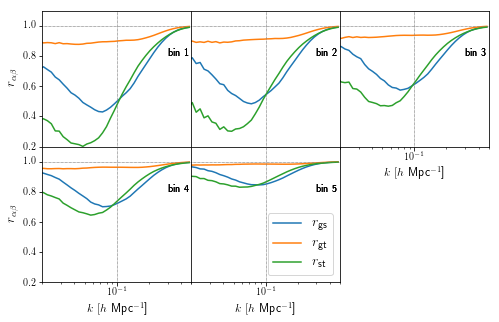

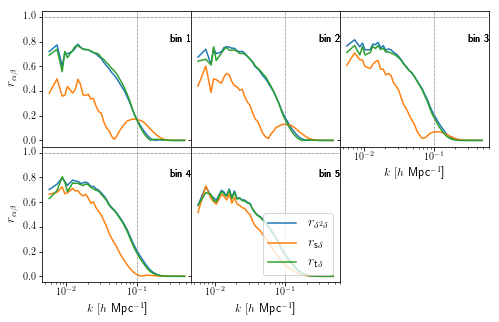

In [84]:
plot_rij(f, 'Wiener')
plot_ridelta(f, 'Wiener')

## Simulations: Gaussian

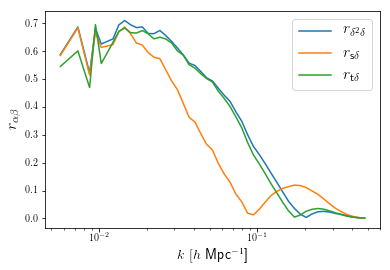

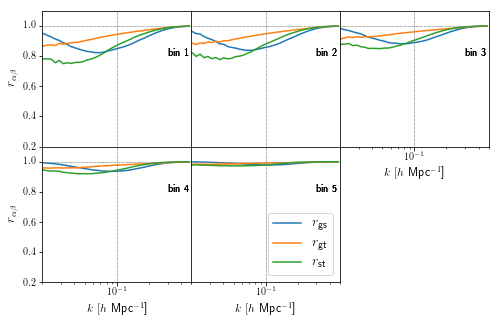

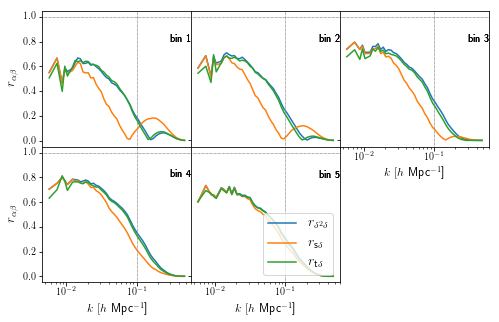

In [85]:
ihalo=1;
plot_rid(ihalo, 'Gaussian')
plot_rij(f, 'Gaussian')
plot_ridelta(f, 'Gaussian')

## Theory Curves

## Inverse Matirx

In [28]:
f2 = h5py.File(Folder+'inversematrix.h5','r')

print(f2['matrix'])
print(f2['ktab'])

def inv_matrix():
    fig3=plt.figure()
    axis= [0.02,0.5,0,1]
    for i in range(1,4):
        for j in range(1,4):
            print(i,j)
            l=i+j
            ax=plt.subplot(330+l)
            ax.plot(f2['ktab'][:],np.abs(f2['matrix'][i-1,j-1,:][:]), lw=1.5)
            #ax.grid(linestyle='dotted', linewidth=0.5)
            plt.xscale('log')
            plt.yscale('log')
    
            plt.axis(axis)

            ax.axvline(0.1, color='gray',ls='dotted', lw=0.5)

    plt.subplots_adjust(hspace=0,wspace=0) # remove spacings
    fig3.savefig('inv_matrix.pdf',bbox_inches='tight')
    plt.show()


## 3D Spline Power Spectrum on Grid


Grid Size: 256$\times$256$\times$256

(256, 256)


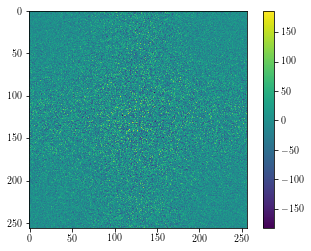

In [3]:
f1 = h5py.File(Folder+'Data/Spline/spline_power_NODE1_256.h5','r')
#print(f['corr_coeff'][0,1][:])
print(np.shape(f1['lin_power'][:,:,1]))
#plt.imshow(f1['lin_power'][:,:,200])
plt.imshow(f1['deltag'][:,:,100])
plt.colorbar()
plt.show()